# Task 3: Song Recommendation Engine


## 3.1 Exploratory Data Analysis


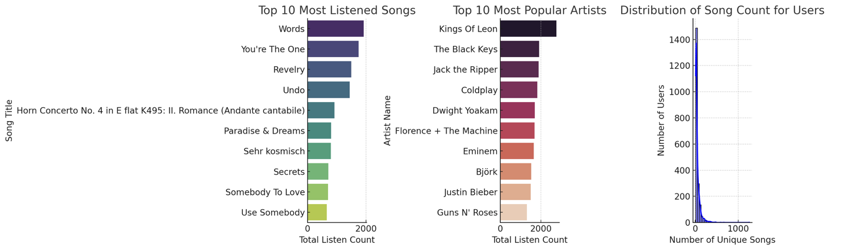 

### Most Listened Songs


The top 10 most listened songs were identified based on the total listen count. The bar chart visually represents these songs, with the song titles on the y-axis and their corresponding total listen counts on the x-axis. This provides a clear view of which songs are most popular among users.

### Most Popular Artists


Similarly, the top 10 most popular artists were determined based on the total listen count for their songs. The chart shows these artists, with artist names on the y-axis and their total listen counts on the x-axis. This highlights which artists have the highest overall popularity in this dataset.

### Distribution of Song Count for Users


The distribution of the number of unique songs listened to by each user was analyzed. The histogram shows the frequency distribution of users based on the number of different songs they have listened to. This gives insights into user listening habits, such as whether most users listen to a wide range of songs or tend to stick to a smaller set of favorites.



## 3.2 Recommendation Engine Design


### Importing Libraries and Preprocessing Data

In [ ]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

df = pd.read_csv('song_dataset.csv')
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

Explanation: This part imports necessary libraries and preprocesses the dataset. pandas is used for data manipulation, sklearn.neighbors for the recommendation algorithm, and ipywidgets for interactive features. The dataset is cleaned by removing duplicates and missing values.

Design Choice: Using pandas for data handling is a standard choice for ease of use and efficiency. The use of NearestNeighbors from sklearn suggests a content-based recommendation approach.

### Creating User-Song Matrix and Model Training

In [ ]:
user_song_matrix = df.pivot_table(index='user', columns='song', values='play_count').fillna(0)

model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
model_knn.fit(user_song_matrix)

Explanation: A user-song matrix is created for the recommendation system, and the NearestNeighbors model is initialized and trained.

Design Choice: The user-song matrix is crucial for collaborative filtering. The cosine metric is used to measure similarity, which is effective for high-dimensional data.

### Recommendation Function

In [ ]:
def recommend_songs(user_id, data, model, original_df, listened_song, n_recommendations=5):
    if user_id not in data.index:
        return ["User ID not found."]
    if listened_song not in original_df['title'].values:
        return ["Song not found."]
    
    user_index = data.index.tolist().index(user_id)
    distances, indices = model.kneighbors(data.iloc[user_index, :].values.reshape(1, -1), n_neighbors=n_recommendations+10)
    
    recommendations = []
    for i in range(1, len(distances.flatten())):
        song_id = data.columns[indices.flatten()[i]]
        if len(recommendations) < n_recommendations:
            song_info = original_df[original_df['song'] == song_id].iloc[0]
            if song_info['title'] != listened_song:
                recommendations.append({
                    'title': song_info['title'],
                    'release': song_info['release'],
                    'artist_name': song_info['artist_name'],
                    'year': song_info['year']
                })
    return recommendations

Explanation: This function takes a user ID, the data matrix, model, original dataset, a listened song, and the number of recommendations to return. It then finds and returns recommended songs.

Design Choice: The function is designed to be flexible, allowing for different numbers of recommendations. It filters out the currently listened song from the recommendations.

### Interactive Widgets and Event Handling

In [ ]:
user_id_input = widgets.Text(description='User ID:')
listened_song_input = widgets.Text(description='Listened Song:')
recommend_button = widgets.Button(description='Recommend')
output = widgets.Output()

def on_recommend_button_clicked(b):
      with output:
        clear_output()
        recommendations = recommend_songs(user_id_input.value, user_song_matrix, model_knn, df, listened_song_input.value)

        if recommendations and isinstance(recommendations[0], dict):
            for rec in recommendations:
                print(f"Title: {rec['title']}, Artist: {rec['artist_name']}, Release: {rec['release']}, Year: {rec['year']}")
        else:
            for rec in recommendations:
                print(rec)

recommend_button.on_click(on_recommend_button_clicked)
display(user_id_input, listened_song_input, recommend_button, output)


Explanation: Interactive widgets for user input and a button to trigger the recommendation process are created. The on_recommend_button_clicked function handles the event when the recommend button is clicked.

Design Choice: Interactive widgets enhance user experience, making it easier to input data and get recommendations.

### Alternative Approaches:
#### Model Choice: 
Instead of NearestNeighbors, other recommendation algorithms like matrix factorization or deep learning models could be used.
#### Data Processing: 
More sophisticated data preprocessing techniques, like normalization or handling sparse data differently, could be explored.
#### User Interface: 
Building a more advanced GUI (Graphical User Interface) using frameworks like Dash or Streamlit, instead of ipywidgets, for a more robust user experience.
#### Feature Engineering: 
Additional features like genre, mood, or user demographics could be included for more personalized recommendations.

## 3.3 Deployment

Check out the song recommender project on GitHub: [Song Recommender on GitHub](https://github.com/Codecodeh/song_recommender)


## 3.4 Explainable Component


### Method for Adding an Explainability Component

#### **a. Calculate Similarity Scores**
- Record the similarity scores between the user's chosen songs and the recommended songs using algorithms like K-Nearest Neighbors.
- These scores can be used to explain why a particular song was recommended.

#### **b. Extract Key Features**
- Analyze features of the user's preference data and the recommended songs, such as genre, artist, tempo, etc., to identify key factors in the recommendation.

#### **c. Create Explanatory Descriptions**
- Generate a textual description based on the similarity scores and key features, explaining the rationale behind the recommendation.
- Example: "This song is recommended because it has a similar style to [other song], which you have listened to frequently."


### Implementation in the Current Code

Enhance the `recommend_songs` function in the Jupyter Notebook to include explanations:

In [ ]:
def recommend_songs(user_id, data, model, original_df, listened_song, n_recommendations=5):
    # existing code to get recommendations...

    explanations = []
    for i in range(1, len(distances.flatten())):
        explanation = generate_explanation(user_id, listened_song, data, model, original_df, indices.flatten()[i])
        explanations.append(explanation)

    return recommendations, explanations

def generate_explanation(user_id, listened_song, data, model, original_df, song_index):
    # Logic to create an explanation
    # Compare the features of the listened song and the recommended song
    # Generate descriptive text based on similarities
    return "This song is recommended because..."

### Design Choices

- **User-Friendly Explanations**: Easy to understand, avoiding technical language.
- **Relevance to User Preferences**: Directly relate to the user's listening history or preferences.
- **Dynamic and Customizable**: Change with each set of recommendations, based on different song aspects.
- **Transparency**: Enhance user trust by being transparent about how recommendations are generated.

### Additional Considerations

- **Performance Impact**: Consider the impact on the performance of the recommendation system.
- **User Feedback Loop**: Incorporate a feedback loop for continuous improvement based on user input.